In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ds_salaries.csv',header=0,delimiter=',',encoding='utf8')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


1. Vẽ biểu đồ cột tổng lương theo từng năm kinh nghiệm

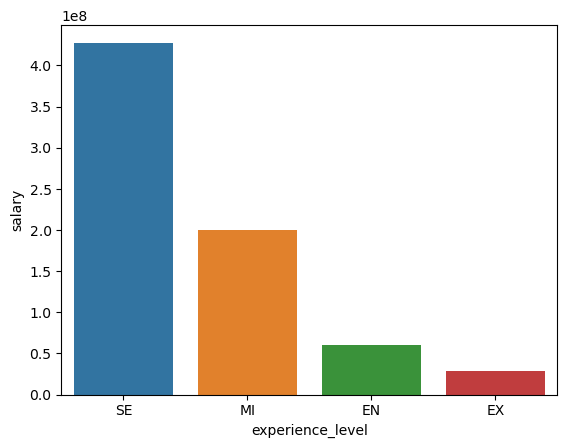

In [8]:
# Vẽ biểu đồ cột tổng lương theo từng năm kinh nghiệm
sns.barplot(x='experience_level',y='salary',data=df, errorbar=None,estimator=sum)
plt.show()



Lương của experience_level giảm dần từ SE, MI, EN, EX

2. Biểu đồ cột thể hiện công việc nào có mức lương cao nhất trong Khoa học dữ liệu?

Text(0.5, 1.0, 'Highest Salary Jobs')

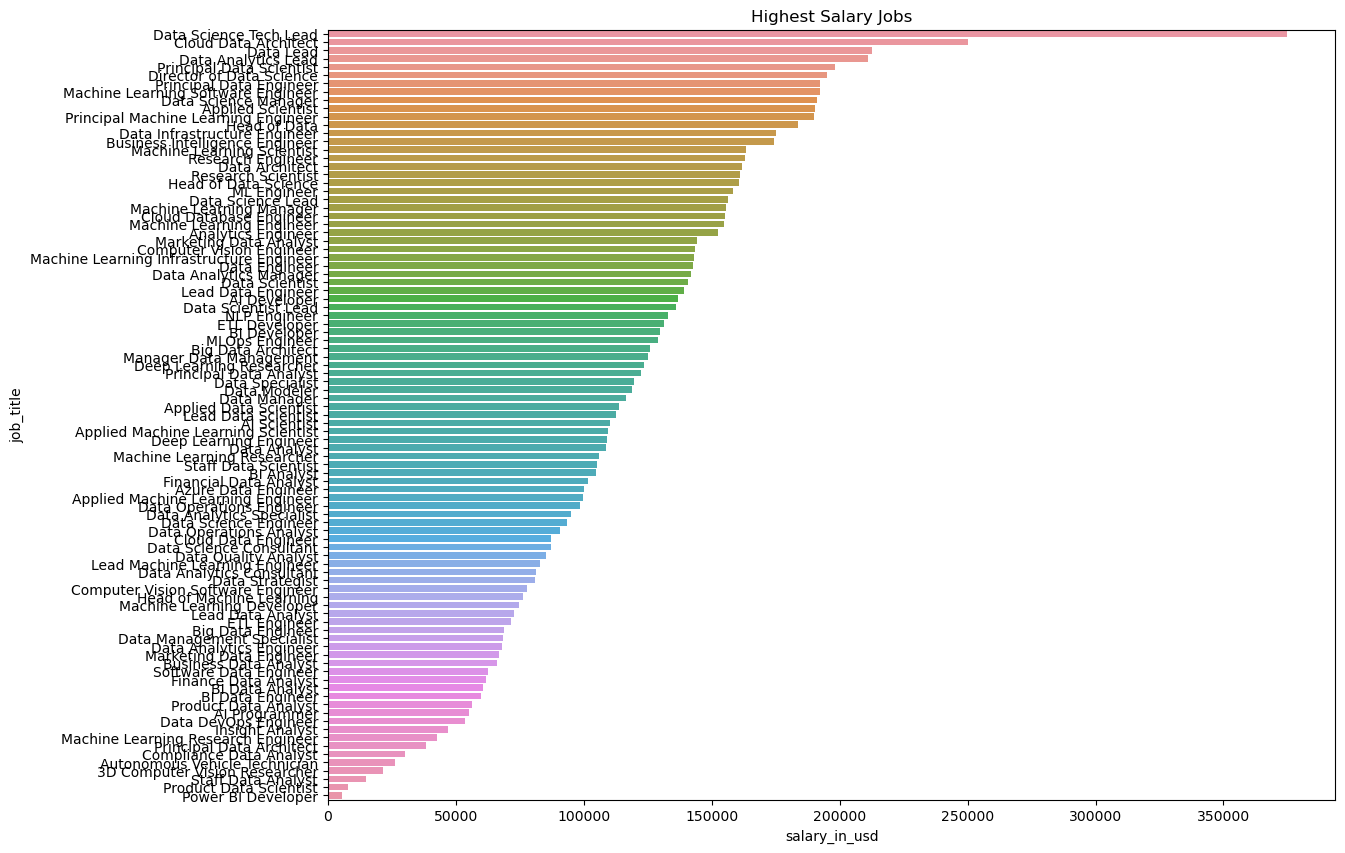

In [3]:
# Xét kích thước của dữ liệu
plt.figure(figsize = (13,10))

# Vẽ biểu đồ
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False), 
            y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).index)
plt.xlabel = ("Salary in USD")
# plt.xticks(rotation='vertical')
plt.title("Highest Salary Jobs")


In [4]:
# Lương cao nhất dựa trên nghề nghiệp 
dftopsalary = ['salary_in_usd', 'job_title']
df[dftopsalary].max()

salary_in_usd                  450000
job_title        Staff Data Scientist
dtype: object

In [6]:
# Lương thấp nhất dựa trên nghề nghiệp
df[dftopsalary].min()


salary_in_usd                             5132
job_title        3D Computer Vision Researcher
dtype: object

Nhận xét:

Biểu đồ cho thấy mức lương cao nhất của Data Analytics Lead là > 400.000 USD và thấp nhất của 3D Computer Vision Researcher là < 3.000 USD.
Mức lương trung bình của người lao động trong lĩnh vực Khoa học dữ liệu là 100.000 USD.

 3.Biểu đồ cột ngang thể hiện top 10 vị trí công việc phổ biến nhất vào năm 2022

In [7]:
df.groupby(['work_year']).agg(
    job_title = ('job_title','count')
).reset_index()

,work_year,job_title
0,2020,76
1,2021,230
2,2022,1664
3,2023,1785


In [8]:

df.salary.value_counts()

100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: salary, Length: 815, dtype: int64

In [9]:

df22 = df[df["work_year"] == 2022]
df22.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
41,2022,MI,FT,Machine Learning Engineer,1650000,INR,20984,IN,50,IN,L
83,2022,EN,FT,AI Developer,300000,USD,300000,IN,50,IN,L
114,2022,EN,FT,Machine Learning Engineer,54000,CHF,56536,CH,100,CH,S
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
323,2022,SE,FT,AI Developer,275000,USD,275000,CA,0,CA,S


In [10]:

df22.job_title.value_counts().head(10)

Data Engineer                488
Data Scientist               405
Data Analyst                 276
Machine Learning Engineer    109
Analytics Engineer            57
Data Architect                46
Data Science Manager          29
Applied Scientist             18
Research Scientist            15
ML Engineer                   15
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

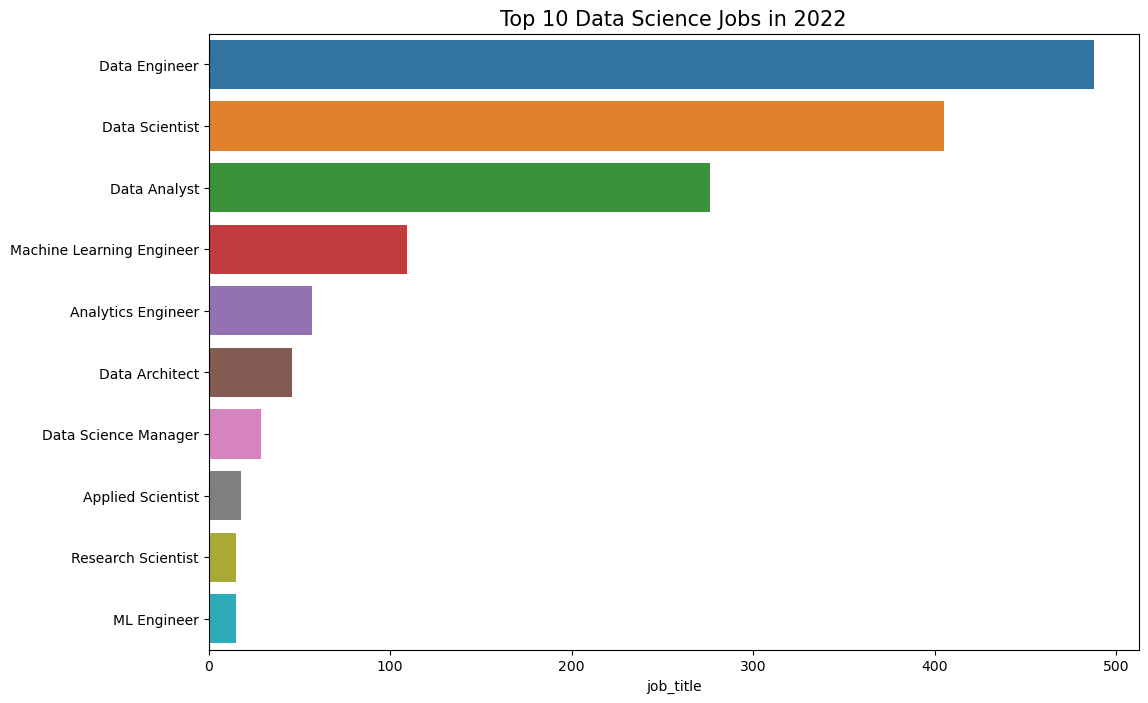

In [11]:

# xét kích thước của dữ liệu
plt.figure(figsize = (12, 8))

# vẽ biểu đồ
sns.barplot(x = df22["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df22["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2022', fontsize = 15)

# Nhận xét

Năm 2022, 10 công việc khoa học dữ liệu phổ biến nhất được hiển thị trên biểu đồ và phổ biến nhất là Kỹ sư dữ liệu.
Nhà khoa học dữ liệu, Kỹ sư dữ liệu, Nhà phân tích dữ liệu là 3 công việc phổ biến nhất dựa trên dữ liệu.

4. Thống kê tỷ lệ làm việc từ xa thay đổi như thế nào từ năm 2020 -2022?

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

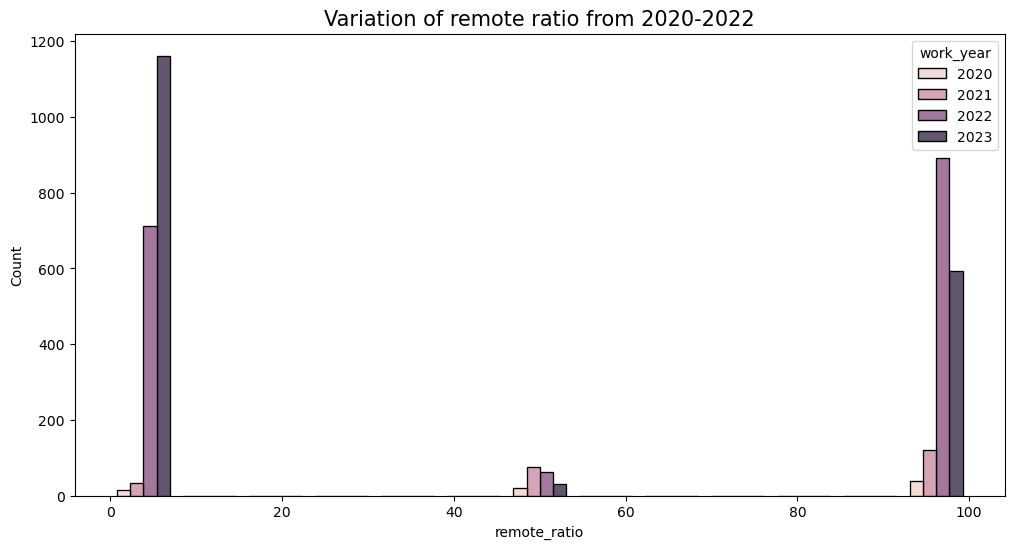

In [14]:
# xét kích thước của dữ liệu
plt.figure(figsize = (12,6))

# vẽ biểu đồ
sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2022', fontsize = 15)

# nhận xét
Từ năm 2020 đến năm 2022, tỷ lệ nhân viên Khoa học Dữ liệu làm việc từ xa sẽ giảm xuống

5. Vẽ biểu đồ thể hiện mức lương của nhân viên (lương_in_usd) có phụ thuộc vào mức độ kinh nghiệm không?


Text(0.5, 1.0, 'Salary variation with exprience level')

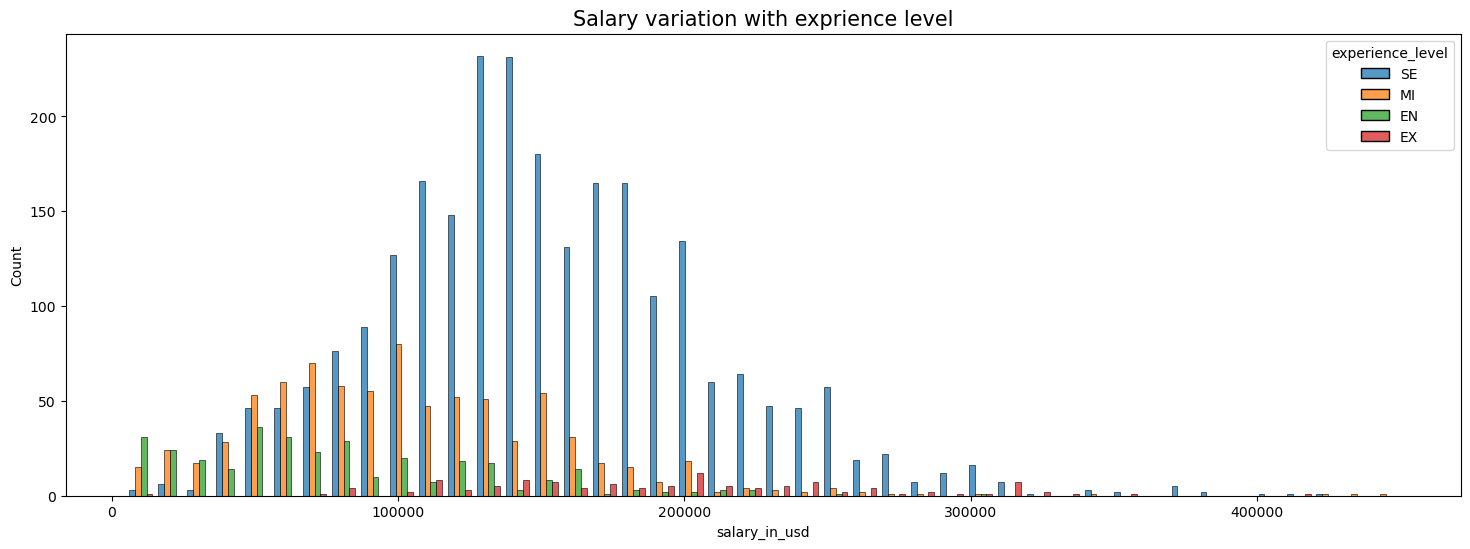

In [15]:
# xét kích thước của dữ liệu
plt.figure(figsize = (18,6))

# vẽ biểu đồ
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)

# nhận xét:
Mức độ kinh nghiệm ảnh hưởng lớn đến mức lương.

6. Vẽ biểu đồ việc phân bổ vị trí nhân viên Data Science  như thế nào?

Text(0.5, 1.0, 'Company Locations with Most Workers')

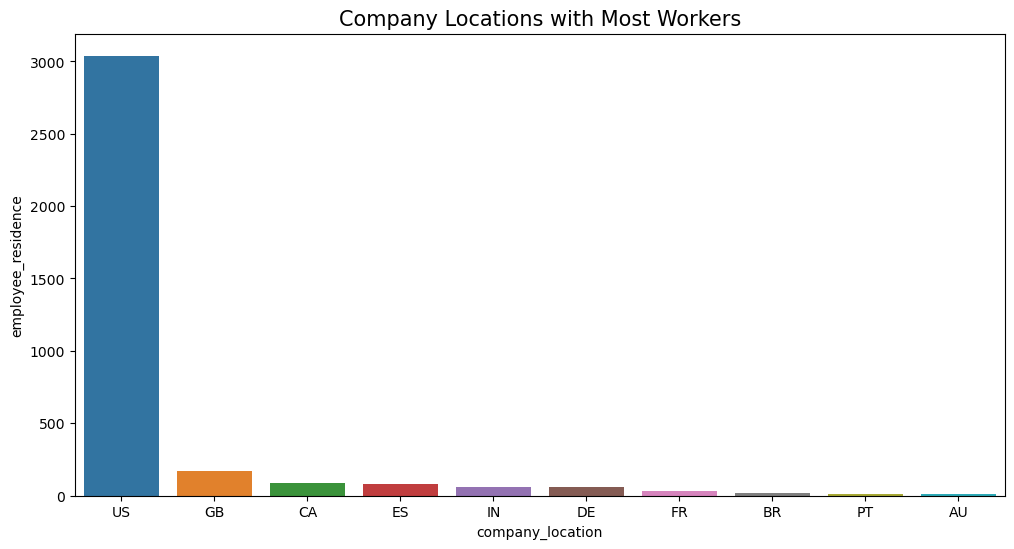

In [16]:
plt.figure(figsize = (12,6))

sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)

# Nhận xét
Công nhân chủ yếu đến từ các công ty Mỹ (Mỹ).


7.  vẽ biểu đồ histogram thể hiện mức lương (salary_in_usd) dựa trên trình độ kinh nghiệm (experience_level)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


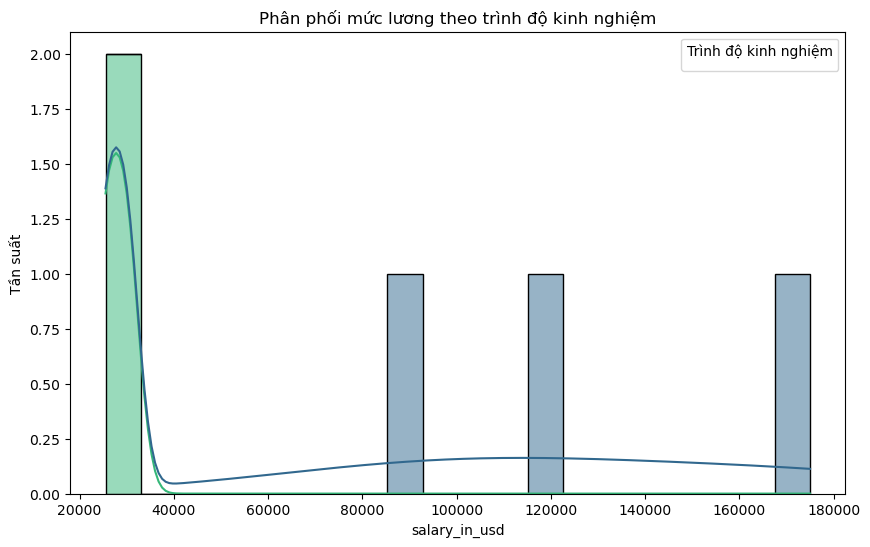

In [27]:
# Đọc dữ liệu
data = {
    'work_year': [2023, 2023, 2023, 2023, 2023],
    'experience_level': ['SE', 'MI', 'MI', 'SE', 'SE'],
    'employment_type': ['FT', 'CT', 'CT', 'FT', 'FT'],
    'job_title': ['Principal Data Scientist', 'ML Engineer', 'ML Engineer', 'Data Scientist', 'Data Scientist'],
    'salary': [80000, 30000, 25500, 175000, 120000],
    'salary_currency': ['EUR', 'USD', 'USD', 'USD', 'USD'],
    'salary_in_usd': [85847, 30000, 25500, 175000, 120000],
    'employee_residence': ['ES', 'US', 'US', 'CA', 'CA'],
    'remote_ratio': [100, 100, 100, 100, 100],
    'company_location': ['ES', 'US', 'US', 'CA', 'CA'],
    'company_size': ['L', 'S', 'S', 'M', 'M']
}

df = pd.DataFrame(data)

# Vẽ biểu đồ histogram theo trình độ kinh nghiệm
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_in_usd', hue='experience_level', multiple='stack', bins=20, kde=True, palette='viridis')
plt.title('Phân phối mức lương theo trình độ kinh nghiệm')
plt.ylabel('Tần suất')
plt.legend(title='Trình độ kinh nghiệm')
plt.show()

In [ ]:
# nhận xét
mức lương dựa trên trình độ kinh nghiệm có sự chênh lệch rõ rệt, mức lương của những người có trình độ kinh nghiệm cao hơn sẽ có mức lương cao hơn những người có trình độ kinh nghiệm thấp hơn